In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from string import punctuation
print(punctuation)
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


clean the original data

In [2]:
df = pd.read_csv("SET_processed_latest_version.csv")
for i in range(df.shape[1]):
    df.iloc[:,i]= df.iloc[:,i].replace([555, 777,888,999,'555','777','888','999' ], np.nan)
text=df.loc[:,['GRYD_ETO_ID','S6b_Other_Activities','S11a_Comments','A1_Description','A2_Description','A3_Description','O1_other_group_name','Group_name_part1','PUSH_1','PULL_1']]
text["text_all"] = text.apply(lambda x: ','.join(x.dropna()), axis=1)


normalize function

In [3]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [4]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

def  normalize (df):
    contents=df.dropna().values
    

    
    
    for i in range (contents.shape[0]):
        contents[i]=contents[i].replace(",", " ")
        
    all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
    all_contents = [i.lower() for i in all_contents]
    all_contents= [i.split() for i in all_contents]
    
    for i in range (len(all_contents)):
        all_contents[i]=remove_noise(all_contents[i],sw)
    
    
    clean_tokens = [[] for _ in range(len(all_contents))]
    other_trash = ['im','a','u','2','wont','thats','dont', 'cant', 'didnt','isnt','ive','doesnt']
    trash_tokens = sw + other_trash
    for i in range(len(all_contents)):
        for token in all_contents[i]:
            if token not in trash_tokens:
                clean_tokens[i].append(token)
       
    

    
    return clean_tokens

In [5]:
original = normalize(text['S11a_Comments'])

combine data + sample data exploration

In [6]:
df=pd.read_csv("tweet_dataset.csv")

In [7]:
df=df.loc[:,['sentiment','selected_text']]

In [8]:
df1=pd.read_csv('data_train.csv')

In [9]:
df2=pd.read_csv('data_test.csv')

In [10]:
df.shape

(40000, 2)

In [11]:
dfnew=pd.concat([df1, df2], ignore_index=True)

In [12]:
dfnew=dfnew.rename(columns={'Emotion':'sentiment','Text':'selected_text'})

In [13]:
df=pd.concat([df, dfnew], ignore_index=True)

In [14]:
df.shape

(51327, 2)

seperate to train_test

In [15]:
df.sample(frac=1)

,sentiment,selected_text
40100,fear,Playing NOW on Hardest: BYZPO Radio Show Sessi...
2351,neutral,NaN
20078,worry,Drinkin` Chai tea and not sleeping.. and check...
20130,love,NaN
12684,worry,mean
...,...,...
18535,worry,Life is over! Just went to get tickets for all...
40594,sadness,I 've heard of women so depressed that they sp...
28708,love,NaN
38724,enthusiasm,NaN


In [16]:
df=pd.concat([df.loc[df['sentiment']=='fear'], df.loc[df['sentiment']=='sadness'],df.loc[df['sentiment']=='neutral'],df.loc[df['sentiment']=='worry'],df.loc[df['sentiment']=='boredom'],df.loc[df['sentiment']=='anger']], ignore_index=True)
df=df.sample(frac=1)
train=df.iloc[:25000,]
train.to_csv('emotion_train.csv',index=False)
test=df.iloc[25000:,]
test.to_csv('emotion_test.csv',index=False)

In [17]:
df.to_csv('emotion.csv', index = False)

.....


In [18]:
fear = normalize(df.loc[df['sentiment']=='fear']['selected_text'])
sadness = normalize(df.loc[df['sentiment']=='sadness']['selected_text'])
neutral = normalize(df.loc[df['sentiment']=='neutral']['selected_text'])
worry = normalize(df.loc[df['sentiment']=='worry']['selected_text'])

boredom = normalize(df.loc[df['sentiment']=='boredom']['selected_text'])
anger = normalize(df.loc[df['sentiment']=='anger']['selected_text'])

In [19]:
boredom[100]

['sorry']

most common tokens for sadness categories

In [20]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token
sadness_words = get_all_words(worry)

In [21]:
from nltk import FreqDist

freq_dist_pos = FreqDist(sadness_words)
print(freq_dist_pos.most_common(100))

[('get', 424), ('go', 376), ('good', 283), ('miss', 216), ('sorry', 200), ('day', 193), ('feel', 189), ('work', 185), ('bad', 175), ('like', 173), ('think', 168), ('hope', 153), ('sad', 142), ('want', 142), ('know', 139), ('time', 134), ('today', 134), ('one', 126), ('really', 124), ('need', 122), ('make', 119), ('well', 108), ('sick', 107), ('hurt', 105), ('back', 104), ('still', 98), ('wish', 98), ('lol', 95), ('love', 93), ('see', 91), ('look', 91), ('oh', 90), ('come', 84), ('much', 84), ('home', 83), ('find', 76), ('happy', 75), ('try', 74), ('take', 73), ('night', 73), ('thing', 71), ('sleep', 71), ('suck', 69), ('ill', 68), ('last', 65), ('great', 64), ('say', 64), ('wait', 62), ('right', 61), ('would', 61), ('fun', 60), ('though', 60), ('new', 59), ('gonna', 59), ('leave', 58), ('poor', 57), ('week', 57), ('hate', 56), ('soon', 56), ('tomorrow', 55), ('lose', 54), ('thanks', 53), ('watch', 53), ('hard', 53), ('tire', 52), ('never', 51), ('please', 51), ('way', 50), ('twitter', 

change the data type to fit the naive bayes model

In [22]:
def get_tweets_for_model(cleaned_tokens_list):
    
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)



In [23]:
fear_new = get_tweets_for_model(fear)
sadness_new = get_tweets_for_model(sadness)
neutral_new = get_tweets_for_model(neutral)
worry_new = get_tweets_for_model(worry)

boredom_new = get_tweets_for_model(boredom)
anger_new = get_tweets_for_model(anger)

In [24]:
import random
fear_data = [(i, "fear")for i in fear_new]
sadness_data = [(i, "sadness")for i in sadness_new]
neutral_data = [(i, "neutral")for i in neutral_new]
worry_data = [(i, "worry")for i in worry_new]

boredom_data = [(i, "boredom")for i in boredom_new]
anger_data = [(i, "anger")for i in anger_new]

In [25]:
anger_data[0]

({'treat': True,
  'unfairly': True,
  'hurt': True,
  'someone': True,
  'love': True},
 'anger')

train test split, fit naive bayes model

In [26]:
dataset = fear_data+ sadness_data +neutral_data+worry_data+boredom_data+anger_data

len(dataset)


24574

In [27]:
random.shuffle(dataset)

train_data = dataset[:20000]
test_data = dataset[20000:]

In [28]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.3596414516834281
Most Informative Features
                   angry = True            anger : neutra =    251.5 : 1.0
                  horror = True             fear : neutra =    162.8 : 1.0
                    fear = True             fear : neutra =    125.5 : 1.0
                    felt = True             fear : neutra =     96.4 : 1.0
                   bored = True           boredo : neutra =     95.0 : 1.0
                   stuck = True           boredo : neutra =     95.0 : 1.0
                frighten = True             fear : neutra =     93.2 : 1.0
                   anger = True            anger : sadnes =     87.9 : 1.0
                 nervous = True             fear : sadnes =     80.6 : 1.0
              girlfriend = True            anger : neutra =     75.5 : 1.0
None


In [29]:
print(classifier.classify(dict([token, True] for token in original[10])))

sadness


add sentiment column to original text df

In [30]:
sentiment=list()
for i in range (len(original)):
    sentiment.append(classifier.classify(dict([token, True] for token in original[i])))

In [31]:
text['sentiment']=np.nan
text=text[text.S11a_Comments.notna()]

In [32]:
text.shape

(991, 12)

In [33]:
emo=pd.read_csv("activities_with_emotion_labels_ruofei.csv")
emo

,S6b_Other_Activities,Unnamed: 1,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,Emotion,S11a_Comments
0,"Working out, CBT, boxing",NaN,School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,fear,"School. Poor grades, car accident, not enough ..."
1,Basketball,NaN,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,sadness,Mother died
2,Extra activities with children,NaN,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,fear,Favor cousin was murder and never found his ki...
3,Actor/dance,NaN,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,sadness,Best friend brother was murder [sic] by 16 and...
4,Singing,NaN,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,sadness,Best fried brother was murder [sic] by 18yr boy
...,...,...,...,...,...,...,...,...,...,...,...
986,NaN,NaN,Friends,NaN,NaN,Friends,No group,NaN,NaN,sadness,friends got shot
987,Wroking out playing basktball,NaN,NaN,NaN,NaN,No other group,Main street,I bang before - I dont want to do it like my o...,the people around right now are putting down I...,fear,Injured
988,Spend time with family,NaN,NaN,NaN,NaN,No other group,Aves Plug,Not really,My son,sadness,Mom left home
989,"Drawing, makeup, video games",NaN,NaN,NaN,NaN,No other group,Group,No,"Yes, work, school",fear,Moving back and forth


In [34]:
text=text.reset_index()

In [35]:
text['sentiment']=emo.Emotion

In [36]:
text

,index,GRYD_ETO_ID,S6b_Other_Activities,S11a_Comments,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,text_all,sentiment
0,0,BVCB-0-144-1,"Working out, CBT, boxing","School. Poor grades, car accident, not enough ...",School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,"BVCB-0-144-1,Working out, CBT, boxing,School. ...",fear
1,1,BVCB-0-174-1,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"BVCB-0-174-1,Basketball,Mother died,Basketball...",sadness
2,2,Southeast 3-10-24-1,Extra activities with children,Favor cousin was murder and never found his ki...,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,"Southeast 3-10-24-1,Extra activities with chil...",fear
3,3,Southeast 3-10-18-1,Actor/dance,Best friend brother was murder [sic] by 16 and...,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-18-1,Actor/dance,Best friend br...",sadness
4,4,Southeast 3-10-17-1,Singing,Best fried brother was murder [sic] by 18yr boy,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-17-1,Singing,Best fried brother...",sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2749,Rampart 1-12-391-3,NaN,friends got shot,Friends,NaN,NaN,Friends,No group,NaN,NaN,"Rampart 1-12-391-3,friends got shot,Friends,Fr...",sadness
987,2750,Southeast 1-24-72-1,Wroking out playing basktball,Injured,NaN,NaN,NaN,No other group,Main street,I bang before - I dont want to do it like my o...,the people around right now are putting down I...,"Southeast 1-24-72-1,Wroking out playing basktb...",fear
988,2751,Northeast-25-68-2,Spend time with family,Mom left home,NaN,NaN,NaN,No other group,Aves Plug,Not really,My son,"Northeast-25-68-2,Spend time with family,Mom l...",sadness
989,2757,Hollenbeck 3-20-298-1,"Drawing, makeup, video games",Moving back and forth,NaN,NaN,NaN,No other group,Group,No,"Yes, work, school","Hollenbeck 3-20-298-1,Drawing, makeup, video g...",fear


In [37]:
temp=0
for i in range (text.shape[0]):
    if (type(text.loc[i,'S11a_Comments'])==str):
        text.loc[i,'sentiment']=sentiment[temp]
        temp=temp+1


In [38]:
text.loc[:,['S11a_Comments','sentiment']].head(10)

,S11a_Comments,sentiment
0,"School. Poor grades, car accident, not enough ...",fear
1,Mother died,sadness
2,Favor cousin was murder and never found his ki...,boredom
3,Best friend brother was murder [sic] by 16 and...,boredom
4,Best fried brother was murder [sic] by 18yr boy,boredom
5,Best friend brother was murder [sic] by 22yr m...,anger
6,My mom going to jail,anger
7,Broke up with my long time boyfriend.,anger
8,Family member killed,anger
9,Friend was shot,anger


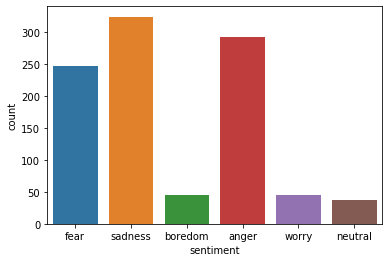

In [39]:
sns.countplot(text['sentiment'])

## correlation finding

inner join two dataframe with key = id, value = sentiment and risk-score

In [40]:
text.shape

(991, 13)

In [3]:
df=pd.read_csv('full_embeddedness.csv')

In [4]:
df.shape
df

,ID,admin,age,sex,zone,gang,family,other,risk
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
2,Southeast 3-10-24-1,1,NaN,2,21.0,NaN,6.626468,-0.225167,-2.651080
3,Southeast 3-10-18-1,1,25.0,1,21.0,-8.583601,6.626468,-0.225167,-2.073084
4,Southeast 3-10-17-1,1,24.0,2,21.0,-8.583601,6.626468,1.413228,-1.421399
...,...,...,...,...,...,...,...,...,...
2760,Southwest 2-23-280-1,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
2761,Northeast-25-64-1,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781
2762,Mission-14-413-1,1,16.0,1,NaN,NaN,5.223674,NaN,2.635519
2763,77th 3-20-376-1,1,14.0,2,NaN,NaN,2.935746,NaN,-2.884790


In [5]:
risk=df.loc[:,['ID','risk']]
risk.head()

,ID,risk
0,BVCB-0-144-1,-5.196776
1,BVCB-0-174-1,9.762419
2,Southeast 3-10-24-1,-2.651080
3,Southeast 3-10-18-1,-2.073084
4,Southeast 3-10-17-1,-1.421399


In [6]:

emotion=text.loc[:,['GRYD_ETO_ID','sentiment']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['sentiment'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
emotion=emotion.rename(columns={'GRYD_ETO_ID':'ID'})
emotion.shape

In [7]:
merged_inner = pd.merge(left=emotion, right=risk, left_on='ID', right_on='ID')

NameError: name 'emotion' is not defined

In [8]:
merged_inner.shape

NameError: name 'merged_inner' is not defined

In [9]:
df=merged_inner.dropna()

NameError: name 'merged_inner' is not defined

In [10]:
df.shape

(2765, 9)

In [11]:
df=df.rename(columns={'gangid':'ID'})
#df is the final one
df

,ID,admin,age,sex,zone,gang,family,other,risk
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
2,Southeast 3-10-24-1,1,NaN,2,21.0,NaN,6.626468,-0.225167,-2.651080
3,Southeast 3-10-18-1,1,25.0,1,21.0,-8.583601,6.626468,-0.225167,-2.073084
4,Southeast 3-10-17-1,1,24.0,2,21.0,-8.583601,6.626468,1.413228,-1.421399
...,...,...,...,...,...,...,...,...,...
2760,Southwest 2-23-280-1,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
2761,Northeast-25-64-1,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781
2762,Mission-14-413-1,1,16.0,1,NaN,NaN,5.223674,NaN,2.635519
2763,77th 3-20-376-1,1,14.0,2,NaN,NaN,2.935746,NaN,-2.884790


In [12]:
sns.boxplot(x='sentiment',y='risk',data=df,palette='rainbow')
plt.ylabel('risk')

ValueError: Could not interpret input 'sentiment'

In [13]:
intake=pd.read_csv('full_intake.csv')
retake=pd.read_csv('full_retake.csv')
full = pd.merge(left=intake, right=retake, left_on='ID', right_on='ID')
full=full.loc[:,['ID',"gang_x",'gang_y']]
full=full.rename(columns={'gang_x':'gang_intake','gang_y':'gang_retake'})
full=full[full['gang_intake'].notna()]

df.to_csv('emotion.csv')

In [14]:
score=pd.read_csv('full_embeddedness.csv')
xx=pd.merge(left=score.drop_duplicates(), right=df.drop_duplicates(), on='ID', how='inner')


xx=xx[xx['admin']!=3]
xx=xx[xx['admin']!=4]

xx = xx.drop_duplicates(subset=['ID','admin'], keep='first')
xx

KeyError: 'admin'

Text(0, 0.5, 'z_score')

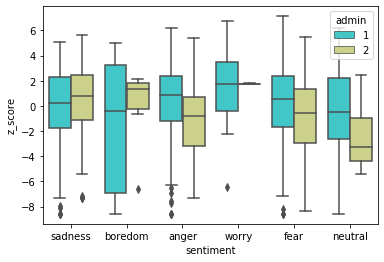

In [58]:
sns.boxplot(x='sentiment',y='gang',data=xx,hue='admin',palette='rainbow')
plt.ylabel('z_score')

In [65]:
sns.swarmplot(x='sentiment',y='gang',data=df,palette='Set2')
plt.ylabel('z_score')

ValueError: Could not interpret input 'gang'

do the same with activity and risk-score

In [15]:
activity=pd.read_csv('SET_S6b_Activities_Categorized.csv')

In [16]:
activity=activity.drop(columns = "Unnamed: 0")

In [17]:
activity=activity.rename(columns={'GRYD_ETO_ID':'gangid'})
activity=activity.dropna()

In [18]:
activity_new = pd.DataFrame(activity.Categorized_Activities.str.split(', ').tolist(), index=activity.gangid).stack()
activity_new = activity_new.reset_index([0, 'gangid'])
activity_new.columns = ['gangid', 'categorized_activity']
activity_new.head()

,gangid,categorized_activity
0,BVCB-0-144-1,sports
1,BVCB-0-174-1,sports
2,Southeast 3-10-24-1,volunteer
3,Southeast 3-10-18-1,art
4,Southeast 3-10-17-1,art


In [19]:
merged_new = pd.merge(left=activity_new, right=risk, left_on='gangid', right_on='ID')

In [20]:
merged_new

,gangid,categorized_activity,ID,risk
0,BVCB-0-144-1,sports,BVCB-0-144-1,-5.196776
1,BVCB-0-174-1,sports,BVCB-0-174-1,9.762419
2,BVCB-0-174-1,sports,BVCB-0-174-1,NaN
3,Southeast 3-10-24-1,volunteer,Southeast 3-10-24-1,-2.651080
4,Southeast 3-10-18-1,art,Southeast 3-10-18-1,-2.073084
...,...,...,...,...
2523,Southwest 2-23-280-1,workout,Southwest 2-23-280-1,-2.667042
2524,Northeast-25-64-1,sports,Northeast-25-64-1,-4.329781
2525,Mission-14-413-1,volunteer,Mission-14-413-1,2.635519
2526,77th 3-20-376-1,sports,77th 3-20-376-1,-2.884790


Text(0, 0.5, 'z_score')

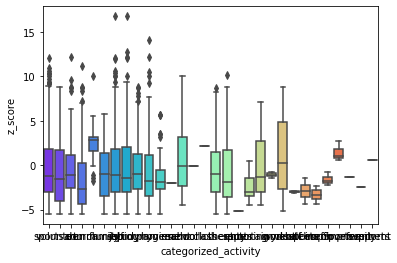

In [21]:
sns.boxplot(x='categorized_activity',y='risk',data=merged_new,palette='rainbow')
plt.ylabel('z_score')

!!!!!!!!!!!!!!! too many actvities, re-grouping

In [45]:
contents=merged_new['categorized_activity'].dropna().values
freq = nltk.FreqDist(contents)
freq

FreqDist({'sports': 606, 'program': 281, 'job': 271, 'other': 251, 'volunteer': 249, 'church': 224, 'study': 204, 'personality_improvement': 186, 'art': 91, 'family': 60, ...})

In [46]:
from collections import Counter
plot_dict = dict(Counter(freq).most_common(50))
plot_dict

{'sports': 606,
 'program': 281,
 'job': 271,
 'other': 251,
 'volunteer': 249,
 'church': 224,
 'study': 204,
 'personality_improvement': 186,
 'art': 91,
 'family': 60,
 'therapy': 58,
 'entertainment': 38,
 'self improvement': 3,
 'sports ': 2,
 'church ': 2,
 'read': 1,
 'sprots': 1}

In [47]:
merged_new.loc[merged_new['categorized_activity'] == 'work', 'categorized_activity'] = 'job'
merged_new.loc[merged_new['categorized_activity'] == 'Sports', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'school', 'categorized_activity'] = 'study'
merged_new.loc[merged_new['categorized_activity'] == 'voluteer', 'categorized_activity'] = 'volunteer'
merged_new.loc[merged_new['categorized_activity'] == 'workout', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'tutoring', 'categorized_activity'] = 'other'
merged_new.loc[merged_new['categorized_activity'] == 'community', 'categorized_activity'] = 'volunteer'
merged_new.loc[merged_new['categorized_activity'] == 'sefimprovement', 'categorized_activity'] = 'selfimprovement'
#merged_new is the final one

In [25]:
merged_new.loc[merged_new['categorized_activity'] == 'selfimprovement', 'categorized_activity'] = 'personality_improvement'

In [44]:
merged_new.loc[merged_new['categorized_activity'] == 'gryd', 'categorized_activity'] = 'program'
merged_new.loc[merged_new['categorized_activity'] == 'class', 'categorized_activity'] = 'study'
merged_new.loc[merged_new['categorized_activity'] == 'femily', 'categorized_activity'] = 'family'
merged_new.loc[merged_new['categorized_activity'] == 'sefimprovement', 'categorized_activity'] = 'selfimprovement'
merged_new.loc[merged_new['categorized_activity'] == 'spports', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'hygiene', 'categorized_activity'] = 'other'

In [48]:
merged_new.loc[merged_new['categorized_activity'] == 'self improvement', 'categorized_activity'] = 'self_improve'
merged_new.loc[merged_new['categorized_activity'] == 'personality_improvement', 'categorized_activity'] = 'self_improve'
merged_new.loc[merged_new['categorized_activity'] == 'sports ', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'church ', 'categorized_activity'] = 'church'
merged_new.loc[merged_new['categorized_activity'] == 'read', 'categorized_activity'] = 'study'
merged_new.loc[merged_new['categorized_activity'] == 'sprots', 'categorized_activity'] = 'sports'

In [49]:
score=pd.read_csv('full_embeddedness.csv')
score.shape

(2765, 9)

In [50]:
act=merged_new
act=act.rename(columns={'gangid':'ID'})


In [51]:
merged_new

,gangid,categorized_activity,ID,risk
0,BVCB-0-144-1,sports,BVCB-0-144-1,-5.196776
1,BVCB-0-174-1,sports,BVCB-0-174-1,9.762419
2,BVCB-0-174-1,sports,BVCB-0-174-1,NaN
3,Southeast 3-10-24-1,volunteer,Southeast 3-10-24-1,-2.651080
4,Southeast 3-10-18-1,art,Southeast 3-10-18-1,-2.073084
...,...,...,...,...
2523,Southwest 2-23-280-1,sports,Southwest 2-23-280-1,-2.667042
2524,Northeast-25-64-1,sports,Northeast-25-64-1,-4.329781
2525,Mission-14-413-1,volunteer,Mission-14-413-1,2.635519
2526,77th 3-20-376-1,sports,77th 3-20-376-1,-2.884790


In [36]:
act

,ID,categorized_activity,ID,risk
0,BVCB-0-144-1,sports,BVCB-0-144-1,-5.196776
1,BVCB-0-174-1,sports,BVCB-0-174-1,9.762419
2,BVCB-0-174-1,sports,BVCB-0-174-1,NaN
3,Southeast 3-10-24-1,volunteer,Southeast 3-10-24-1,-2.651080
4,Southeast 3-10-18-1,art,Southeast 3-10-18-1,-2.073084
...,...,...,...,...
2523,Southwest 2-23-280-1,sports,Southwest 2-23-280-1,-2.667042
2524,Northeast-25-64-1,sports,Northeast-25-64-1,-4.329781
2525,Mission-14-413-1,volunteer,Mission-14-413-1,2.635519
2526,77th 3-20-376-1,sports,77th 3-20-376-1,-2.884790


In [52]:
full=pd.merge(left=merged_new,right=score,on='ID',how='inner')

In [53]:
full

,gangid,categorized_activity,ID,risk_x,admin,age,sex,zone,gang,family,other,risk_y
0,BVCB-0-144-1,sports,BVCB-0-144-1,-5.196776,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776
1,BVCB-0-174-1,sports,BVCB-0-174-1,9.762419,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
2,BVCB-0-174-1,sports,BVCB-0-174-1,9.762419,1,20.0,1,22.0,2.931780,-0.597945,0.411312,NaN
3,BVCB-0-174-1,sports,BVCB-0-174-1,NaN,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
4,BVCB-0-174-1,sports,BVCB-0-174-1,NaN,1,20.0,1,22.0,2.931780,-0.597945,0.411312,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4861,Southwest 2-23-280-1,sports,Southwest 2-23-280-1,-2.667042,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
4862,Northeast-25-64-1,sports,Northeast-25-64-1,-4.329781,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781
4863,Mission-14-413-1,volunteer,Mission-14-413-1,2.635519,1,16.0,1,NaN,NaN,5.223674,NaN,2.635519
4864,77th 3-20-376-1,sports,77th 3-20-376-1,-2.884790,1,14.0,2,NaN,NaN,2.935746,NaN,-2.884790


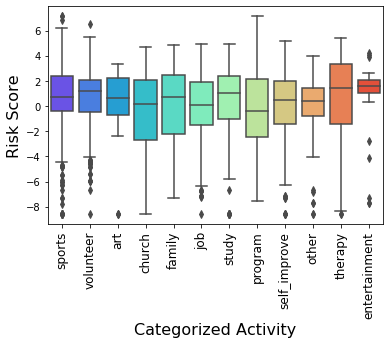

In [72]:
sns.boxplot(x='categorized_activity',y='gang',data=full,palette='rainbow')
plt.ylabel('risk_score')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.xlabel('Categorized Activity', fontsize=16)
plt.ylabel('Risk Score', fontsize=16)
plt.savefig('Activity.pdf',bbox_inches = 'tight')  

In [68]:
contents=merged_new['categorized_activity'].dropna().values
freq = nltk.FreqDist(contents)
from collections import Counter
plot_dict = dict(Counter(freq).most_common(50))
plot_dict

{'sports': 609,
 'program': 281,
 'job': 271,
 'other': 251,
 'volunteer': 249,
 'church': 226,
 'study': 205,
 'self_improve': 189,
 'art': 91,
 'family': 60,
 'therapy': 58,
 'entertainment': 38}

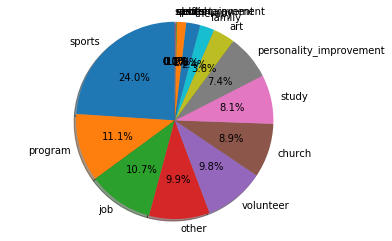

In [86]:
labels = plot_dict.keys()
sizes = plot_dict.values()


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

do the same with gender and age 

In [87]:
ag=pd.read_csv('SET_processed_latest_version.csv')

In [88]:
ag=ag.loc[:,['GRYD_ETO_ID','AGE_1_FB','SEX_1']]
ag=ag.rename(columns={'GRYD_ETO_ID':'gangid','AGE_1_FB':'age','SEX_1':'sex'})

In [89]:
ag = pd.merge(left=ag, right=risk, left_on='gangid', right_on='gangid')

KeyError: 'gangid'

In [90]:
ag.head()

,gangid,age,sex
0,BVCB-0-144-1,20.0,2
1,BVCB-0-174-1,21.0,1
2,Southeast 3-10-24-1,NaN,2
3,Southeast 3-10-18-1,25.0,1
4,Southeast 3-10-17-1,24.0,2


In [92]:
sns.boxplot(x='sex',y='sum',data=ag,palette='rainbow')
plt.ylabel('z_score')

ValueError: Could not interpret input 'sum'

In [93]:
for i in range (13,18):
    ag.loc[ag['age'] == i, 'age'] = '13-17'
    
for i in range (18,25):
    ag.loc[ag['age'] == i, 'age'] = '19-24'
    
for i in range (25,31):
    ag.loc[ag['age'] == i, 'age'] = '25-30'
    
for i in range (31,38):
    ag.loc[ag['age'] == i, 'age'] = '31-37'    

In [94]:
sns.boxplot(x='age',y='sum',data=ag,palette='rainbow')
plt.ylabel('z_score')
plt.xticks(rotation=90)

ValueError: Could not interpret input 'sum'

In [95]:
ag

,gangid,age,sex
0,BVCB-0-144-1,19-24,2
1,BVCB-0-174-1,19-24,1
2,Southeast 3-10-24-1,NaN,2
3,Southeast 3-10-18-1,25-30,1
4,Southeast 3-10-17-1,19-24,2
...,...,...,...
2760,Southwest 2-23-280-1,13-17,2
2761,Northeast-25-64-1,13-17,1
2762,Mission-14-413-1,13-17,1
2763,77th 3-20-376-1,13-17,2


In [96]:
text

,index,GRYD_ETO_ID,S6b_Other_Activities,S11a_Comments,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,text_all,sentiment
0,0,BVCB-0-144-1,"Working out, CBT, boxing","School. Poor grades, car accident, not enough ...",School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,"BVCB-0-144-1,Working out, CBT, boxing,School. ...",fear
1,1,BVCB-0-174-1,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"BVCB-0-174-1,Basketball,Mother died,Basketball...",sadness
2,2,Southeast 3-10-24-1,Extra activities with children,Favor cousin was murder and never found his ki...,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,"Southeast 3-10-24-1,Extra activities with chil...",boredom
3,3,Southeast 3-10-18-1,Actor/dance,Best friend brother was murder [sic] by 16 and...,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-18-1,Actor/dance,Best friend br...",boredom
4,4,Southeast 3-10-17-1,Singing,Best fried brother was murder [sic] by 18yr boy,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-17-1,Singing,Best fried brother...",boredom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2749,Rampart 1-12-391-3,NaN,friends got shot,Friends,NaN,NaN,Friends,No group,NaN,NaN,"Rampart 1-12-391-3,friends got shot,Friends,Fr...",fear
987,2750,Southeast 1-24-72-1,Wroking out playing basktball,Injured,NaN,NaN,NaN,No other group,Main street,I bang before - I dont want to do it like my o...,the people around right now are putting down I...,"Southeast 1-24-72-1,Wroking out playing basktb...",sadness
988,2751,Northeast-25-68-2,Spend time with family,Mom left home,NaN,NaN,NaN,No other group,Aves Plug,Not really,My son,"Northeast-25-68-2,Spend time with family,Mom l...",sadness
989,2757,Hollenbeck 3-20-298-1,"Drawing, makeup, video games",Moving back and forth,NaN,NaN,NaN,No other group,Group,No,"Yes, work, school","Hollenbeck 3-20-298-1,Drawing, makeup, video g...",fear


In [97]:
emotion=text.loc[:,['GRYD_ETO_ID','sentiment']]

In [98]:
emotion

,GRYD_ETO_ID,sentiment
0,BVCB-0-144-1,fear
1,BVCB-0-174-1,sadness
2,Southeast 3-10-24-1,boredom
3,Southeast 3-10-18-1,boredom
4,Southeast 3-10-17-1,boredom
...,...,...
986,Rampart 1-12-391-3,fear
987,Southeast 1-24-72-1,sadness
988,Northeast-25-68-2,sadness
989,Hollenbeck 3-20-298-1,fear


In [99]:
emotion.to_csv('emotion.csv')

In [100]:
new=pd.read_csv('prob_stra_intake_retest.csv')

In [101]:
intake = full[full['admin']==1]
retest = full[full['admin']==2]

KeyError: 'admin'

In [102]:
intake['ID'].value_counts()

Harbor-21-205-1         1
Northeast-20-268-2      1
Southeast 2-20-214-1    1
Newton 2-23-92-2        1
Southwest 1-15-296-2    1
                       ..
Southwest 2-23-124-1    1
CPHBRE-0-61-1           1
Southwest 2-23-75-1     1
Newton 1-17-182-1       1
Northeast-20-10-3       1
Name: ID, Length: 471, dtype: int64

In [103]:
retest = retest.drop_duplicates(subset = ["ID"])
len(retest)

NameError: name 'retest' is not defined

In [104]:
intake = intake.drop_duplicates(subset = ["ID"])
len(intake)

471

In [105]:
ids = retest['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
intake = intake[intake['ID'].isin(unique_ids)]
len(intake)

NameError: name 'retest' is not defined

In [106]:
ids = intake['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
len(unique_ids)
retest = retest[retest['ID'].isin(unique_ids)]
len(retest)

NameError: name 'retest' is not defined

In [107]:
new = intake.append(retest)

NameError: name 'retest' is not defined

In [109]:
new

,ID,Problem,Problem_Label,Strategy,Strategy_Label,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Behavior issues,referred him to in-house services through sea ...,job/school readiness,intake,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
1,77th 1-16-81-1,low self esteem,Behavior issues,life skills- self love,life skill workshop,intake,18.0,2,1.0,0.564769,1.581231,NaN,-0.432885
2,77th 1-16-95-1,client has girl drama at school with gossiping...,Emotion issues,one on one anger management skills,anger management,intake,17.0,2,1.0,1.874593,-1.282688,NaN,2.209041
3,77th 1-16-110-1,client and mother got into a fight and she got...,Behavior issues,refer her to a youth pastor,job/school readiness,intake,15.0,2,1.0,1.277710,1.478281,NaN,2.806262
4,77th 1-16-114-1,employment related issue,Employment related issues,cm will have her start job readiness program i...,job/school readiness,intake,16.0,2,1.0,-0.369860,-2.322409,NaN,-0.246181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Southwest 2-23-192-1,client is on probation,Behavior issues,ciw and cm will help client meet his requirement,job/school readiness,retest,17.0,1,23.0,NaN,0.985030,4.235873,-4.112033
620,Southwest 2-23-193-1,client is on probation and wants to complete a...,Behavior issues,cm will provide all tasks (wraparound services...,job/school readiness,retest,17.0,2,23.0,NaN,0.036840,NaN,-3.642911
621,Southwest 2-23-202-1,client needs to complete 50 hours of community...,Behavior issues,cm will provide task to complete all community...,job/school readiness,retest,18.0,1,23.0,NaN,3.375503,NaN,-5.142339
622,Southwest 2-23-219-1,client needs to complete 50 hours of community...,Behavior issues,cm will refer client to internal workshops to ...,job/school readiness,retest,15.0,1,23.0,NaN,1.218557,NaN,-5.485775


In [108]:
sns.boxplot(y='risk', x='categorized_activity', data=new, palette="colorblind",hue='admin')
plt.xticks(rotation=90)


ValueError: Could not interpret input 'categorized_activity'